In [1]:
!pip install --upgrade pip setuptools wheel


In [2]:
!pip cache purge


Files removed: 18


In [1]:
!pip install tensorflow-gpu==2.10.0


In [1]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.10.0


In [4]:
#import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
X = dataset.iloc[:,3:13]
y= dataset.iloc[:,13]

In [11]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [12]:
###Feature engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [13]:
##concatenate these variables with dataframe
X.drop(['Geography','Gender'],inplace =True, axis=1)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [16]:
X=pd.concat([X,geography, gender], axis=1)

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [18]:
##splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state =0)

In [19]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_test.shape

(2000, 11)

In [25]:
### Create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


In [55]:
###Let's initialize the ANN

classifier = Sequential()

In [56]:
## Adding the input layer
classifier.add(Dense(units = 11,activation='relu'))

In [57]:
## Adding the first hidden layer
classifier.add(Dense(units =7,activation ='relu'))
classifier.add(Dropout(0.2))

In [58]:
## adding the second hidden layer
classifier.add(Dense(units =6,activation ='relu'))
classifier.add(Dropout(0.3))

In [59]:
#Adding the output layer
classifier.add(Dense(units =1,activation='sigmoid'))

In [60]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [61]:
classifier.compile(optimizer = opt,loss= 'binary_crossentropy',metrics=['accuracy'])

In [39]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33, batch_size =10,epochs =20)

Epoch 1/20
536/536 [==============================] - 2s 4ms/step - loss: 0.2902 - accuracy: 0.8830 - val_loss: 0.4345 - val_accuracy: 0.8330
Epoch 2/20
536/536 [==============================] - 1s 3ms/step - loss: 0.2946 - accuracy: 0.8796 - val_loss: 0.4160 - val_accuracy: 0.8349
Epoch 3/20
536/536 [==============================] - 1s 2ms/step - loss: 0.2926 - accuracy: 0.8781 - val_loss: 0.4311 - val_accuracy: 0.8357
Epoch 4/20
536/536 [==============================] - 1s 2ms/step - loss: 0.2902 - accuracy: 0.8804 - val_loss: 0.4389 - val_accuracy: 0.8387
Epoch 5/20
536/536 [==============================] - 1s 2ms/step - loss: 0.2888 - accuracy: 0.8796 - val_loss: 0.4553 - val_accuracy: 0.8360
Epoch 6/20
536/536 [==============================] - 1s 2ms/step - loss: 0.2922 - accuracy: 0.8809 - val_loss: 0.4532 - val_accuracy: 0.8342
Epoch 7/20
536/536 [==============================] - 1s 3ms/step - loss: 0.2933 - accuracy: 0.8778 - val_loss: 0.4395 - val_accuracy: 0.8342
Epoch 

In [41]:
model_history.history

{'loss': [0.29016390442848206,
  0.2945784032344818,
  0.292606383562088,
  0.290227472782135,
  0.2887743413448334,
  0.29215991497039795,
  0.29333874583244324,
  0.2911457419395447,
  0.2909436523914337,
  0.29336604475975037,
  0.2910258173942566,
  0.29132258892059326,
  0.2892898917198181,
  0.2987709641456604,
  0.2922622859477997,
  0.2904742360115051,
  0.2896958291530609,
  0.28933313488960266,
  0.29396653175354004,
  0.29161694645881653],
 'accuracy': [0.8830005526542664,
  0.8796417117118835,
  0.8781489133834839,
  0.8803881406784058,
  0.8796417117118835,
  0.8809479475021362,
  0.8777757287025452,
  0.880201518535614,
  0.8792685270309448,
  0.8818809390068054,
  0.880201518535614,
  0.880014955997467,
  0.8822541236877441,
  0.8798283338546753,
  0.8790819048881531,
  0.880014955997467,
  0.8790819048881531,
  0.880014955997467,
  0.8796417117118835,
  0.8775891065597534],
 'val_loss': [0.4344862401485443,
  0.416005402803421,
  0.4310718774795532,
  0.4389435350894928

In [62]:
##Early stopping (when the accuracy is not increaing automatically training of the model will stop)
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

#ref- https://keras.io/api/callbacks/early_stopping/


In [63]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33, batch_size =10,epochs =1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4691 - accuracy: 0.7975 - val_loss: 0.4467 - val_accuracy: 0.7747
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4288 - accuracy: 0.8097 - val_loss: 0.4189 - val_accuracy: 0.7982
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4002 - accuracy: 0.8242 - val_loss: 0.4133 - val_accuracy: 0.8270
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3979 - accuracy: 0.8339 - val_loss: 0.3863 - val_accuracy: 0.8353
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3854 - accuracy: 0.8358 - val_loss: 0.3800 - val_accuracy: 0.8395
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3873 - accuracy: 0.8364 - val_loss: 0.3887 - val_accuracy: 0.8357
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3867 - accuracy: 0.8412 - val_loss: 0.4074 - val_accuracy:

In [64]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

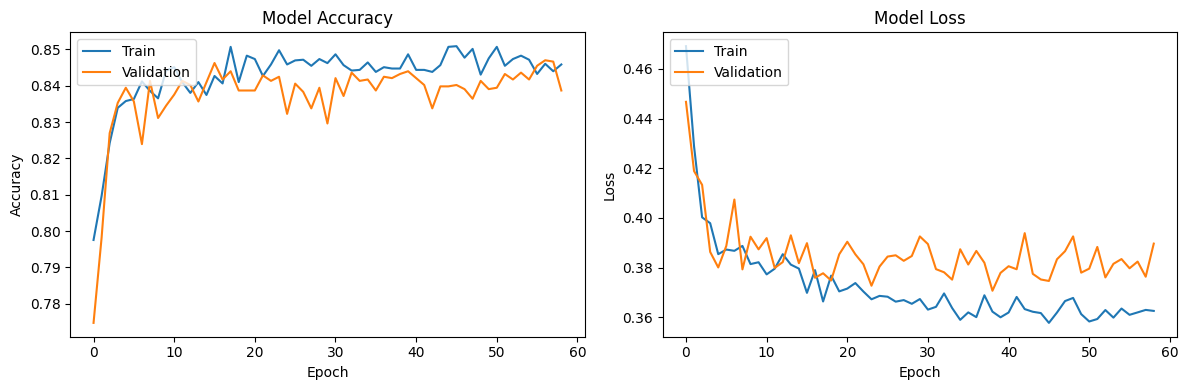

In [65]:
import matplotlib.pyplot as plt

# Assuming model_history is the history object from your model training
history = model_history.history

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [66]:
##Making predictions for the test data
y_pred = classifier.predict(X_test)
y_pred =(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [67]:
##confusion metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1587,   29],
       [ 256,  128]])

In [68]:
#calculate the accuracy

from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred,y_test)
score


0.8575

In [69]:
## get the weights store in pickle
classifier.get_weights()


[array([[ 2.2004254e+00,  1.9332002e+00,  1.7303725e-01, -1.8794774e-01,
          9.5149353e-02,  7.7215672e-02,  8.9216143e-01, -4.2458412e-01,
         -8.1445026e-01,  3.7007439e-01,  3.0413099e-02],
        [-4.1016918e-03, -2.8584118e+00,  1.1839387e+00,  2.2792106e+00,
         -2.6591551e+00,  2.7383659e+00, -3.6347618e+00, -2.9518035e-01,
         -2.0268962e+00, -2.8307855e+00, -3.5196011e+00],
        [ 2.1887434e-01,  1.3614721e+00,  1.9822623e-01,  5.6371468e-01,
          1.0556438e+00, -3.2949943e-02, -2.2061501e-01, -2.8926608e-01,
          2.3679996e-01, -8.2679570e-01,  3.0304375e-01],
        [-1.5465878e+00, -1.0534208e+00, -3.8656442e+00,  1.1283741e+00,
          3.4647176e-01, -7.9473633e-01, -1.1359247e+00,  9.4928074e-01,
          2.5931866e+00, -7.1383035e-01, -1.3972195e+00],
        [ 3.9857453e-01, -5.3440595e-01, -4.1505246e+00, -9.2173660e-01,
         -3.6926544e-01, -2.4598654e-01, -1.0585510e+00,  4.2999978e+00,
         -3.2729024e-01,  1.2105113e+0